In [2]:
!pip install opencv-python

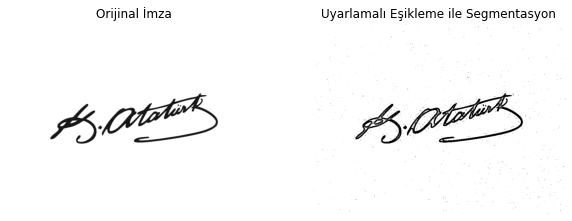

In [7]:
import cv2
from matplotlib import pyplot as plt

# Görüntüm siyah beyaz imza resmi 
image = cv2.imread('ataturkimza.jpg', 0)

# Segmentasyonun farkı görülebilmesi için uyarlamalı eşikleme segmentasyonu tercih ettim 
# Uyarlamalı Eşikleme yöntemi kullanarak segmentasyon yap
adaptive_thresh = cv2.adaptiveThreshold(image, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                        cv2.THRESH_BINARY, 11, 2)

# Orijinal ve segmentasyonlu görüntüleri göster
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Orijinal İmza')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(adaptive_thresh, cmap='gray')
plt.title('Uyarlamalı Eşikleme ile Segmentasyon')
plt.axis('off')

plt.show()


In [8]:
#özellikle aydınlatma koşulları ve kontrastın değişken olduğu durumlarda daha iyi sonuçlar verebilir

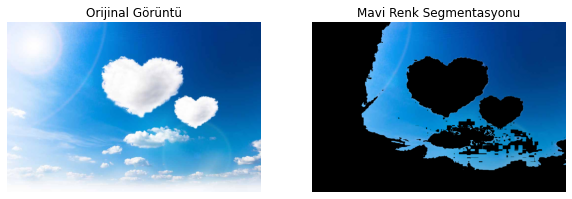

In [10]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Görüntüyü yükle
image = cv2.imread('Gokyuzu.jpg')

# Görüntüyü BGR'den HSV renk uzayına çevir
hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

# Mavi renk için HSV aralığını belirle
lower_blue = np.array([100, 150, 50])   # Alt sınır (H, S, V)
upper_blue = np.array([140, 255, 255])  # Üst sınır (H, S, V)

# Belirtilen HSV aralığına göre mask oluştur
mask = cv2.inRange(hsv_image, lower_blue, upper_blue)

# Maskeyi kullanarak orijinal görüntüyü segment edin
segmented_image = cv2.bitwise_and(image, image, mask=mask)

# Orijinal ve segmentasyonlu görüntüleri göster
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Orijinal Görüntü')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(segmented_image, cv2.COLOR_BGR2RGB))
plt.title('Mavi Renk Segmentasyonu')
plt.axis('off')

plt.show()


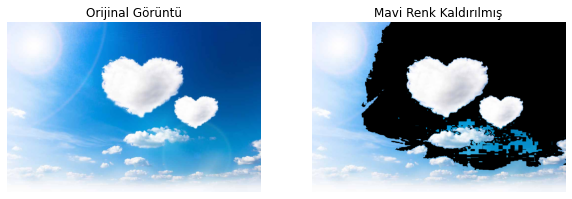

In [11]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Görüntüyü yükle
image = cv2.imread('Gokyuzu.jpg')

# Görüntüyü BGR'den HSV renk uzayına çevir
hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

# Mavi renk için HSV aralığını belirle
lower_blue = np.array([100, 150, 50])   # Alt sınır (H, S, V)
upper_blue = np.array([140, 255, 255])  # Üst sınır (H, S, V)

# Belirtilen HSV aralığına göre maske oluştur
mask = cv2.inRange(hsv_image, lower_blue, upper_blue)

# Maskeyi tersine çevir (invert)
mask_inv = cv2.bitwise_not(mask)

# Ters maskeyi kullanarak orijinal görüntüde mavi rengi kaldır
image_without_blue = cv2.bitwise_and(image, image, mask=mask_inv)

# Orijinal ve işlenmiş görüntüleri göster
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Orijinal Görüntü')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(image_without_blue, cv2.COLOR_BGR2RGB))
plt.title('Mavi Renk Kaldırılmış')
plt.axis('off')

plt.show()


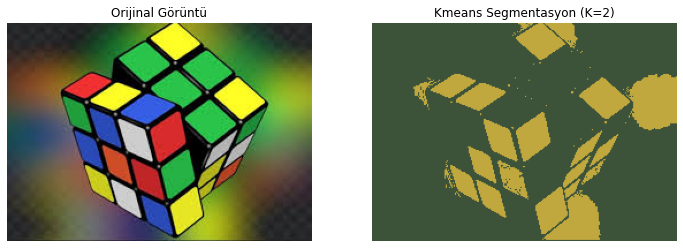

In [17]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Görüntüyü yükle
image = cv2.imread('zekakupu.jpeg')

# Görüntüyü BGR'den RGB'ye çevir
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Görüntüyü 2D array formatına dönüştür
pixels = image_rgb.reshape(-1, 3)

# Kmeans parametreleri
num_clusters = 2  # Küme sayısı (renk sayısı)

# Kmeans kümeleme uygulama
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=num_clusters, random_state=0)
kmeans.fit(pixels)

# Küme merkezlerini ve etiketleri al
centers = kmeans.cluster_centers_
labels = kmeans.labels_

# Her pikselin hangi kümeye ait olduğunu yeniden düzenle
segmented_image = centers[labels].reshape(image_rgb.shape).astype(np.uint8)

# Orijinal ve segmentasyonlu görüntüleri göster
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(image_rgb)
plt.title('Orijinal Görüntü')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(segmented_image)
plt.title(f'Kmeans Segmentasyon (K={num_clusters})')
plt.axis('off')

plt.show()


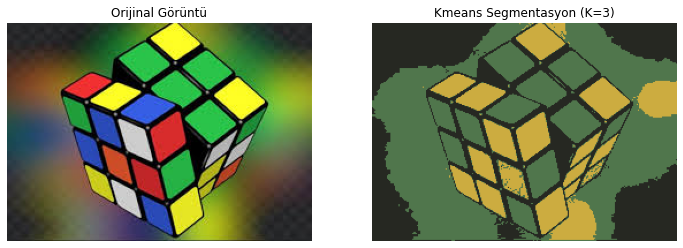

In [18]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Görüntüyü yükle
image = cv2.imread('zekakupu.jpeg')

# Görüntüyü BGR'den RGB'ye çevir
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Görüntüyü 2D array formatına dönüştür
pixels = image_rgb.reshape(-1, 3)

# Kmeans parametreleri
num_clusters = 3  # Küme sayısı (renk sayısı)

# Kmeans kümeleme uygulama
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=num_clusters, random_state=0)
kmeans.fit(pixels)

# Küme merkezlerini ve etiketleri al
centers = kmeans.cluster_centers_
labels = kmeans.labels_

# Her pikselin hangi kümeye ait olduğunu yeniden düzenle
segmented_image = centers[labels].reshape(image_rgb.shape).astype(np.uint8)

# Orijinal ve segmentasyonlu görüntüleri göster
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(image_rgb)
plt.title('Orijinal Görüntü')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(segmented_image)
plt.title(f'Kmeans Segmentasyon (K={num_clusters})')
plt.axis('off')

plt.show()


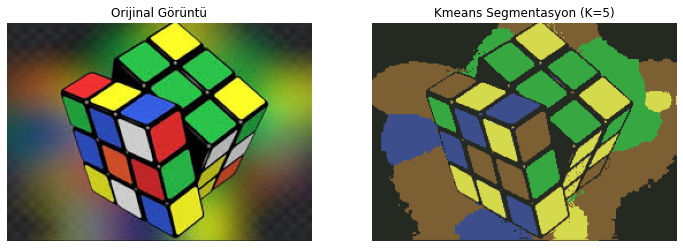

In [19]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Görüntüyü yükle
image = cv2.imread('zekakupu.jpeg')

# Görüntüyü BGR'den RGB'ye çevir
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Görüntüyü 2D array formatına dönüştür
pixels = image_rgb.reshape(-1, 3)

# Kmeans parametreleri
num_clusters = 5  # Küme sayısı (renk sayısı)

# Kmeans kümeleme uygulama
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=num_clusters, random_state=0)
kmeans.fit(pixels)

# Küme merkezlerini ve etiketleri al
centers = kmeans.cluster_centers_
labels = kmeans.labels_

# Her pikselin hangi kümeye ait olduğunu yeniden düzenle
segmented_image = centers[labels].reshape(image_rgb.shape).astype(np.uint8)

# Orijinal ve segmentasyonlu görüntüleri göster
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(image_rgb)
plt.title('Orijinal Görüntü')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(segmented_image)
plt.title(f'Kmeans Segmentasyon (K={num_clusters})')
plt.axis('off')

plt.show()

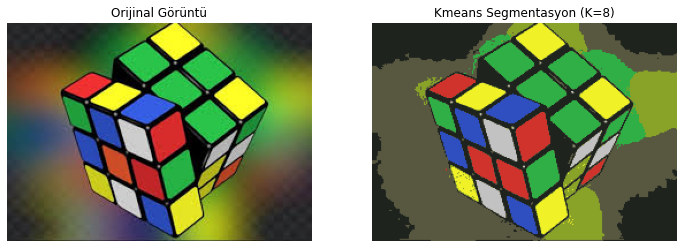

In [20]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Görüntüyü yükle
image = cv2.imread('zekakupu.jpeg')

# Görüntüyü BGR'den RGB'ye çevir
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Görüntüyü 2D array formatına dönüştür
pixels = image_rgb.reshape(-1, 3)

# Kmeans parametreleri
num_clusters = 8  # Küme sayısı (renk sayısı)

# Kmeans kümeleme uygulama
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=num_clusters, random_state=0)
kmeans.fit(pixels)

# Küme merkezlerini ve etiketleri al
centers = kmeans.cluster_centers_
labels = kmeans.labels_

# Her pikselin hangi kümeye ait olduğunu yeniden düzenle
segmented_image = centers[labels].reshape(image_rgb.shape).astype(np.uint8)

# Orijinal ve segmentasyonlu görüntüleri göster
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(image_rgb)
plt.title('Orijinal Görüntü')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(segmented_image)
plt.title(f'Kmeans Segmentasyon (K={num_clusters})')
plt.axis('off')

plt.show()